In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [24]:
# Define the base site
base_url = "https://www.houseinrwanda.com/for-sale"

# Request the page
response = requests.get(base_url)
response.status_code


200

In [25]:
soup = BeautifulSoup(response.text, 'lxml')
soup

<!-- THEME DEBUG --><!-- THEME HOOK: 'html' --><!-- FILE NAME SUGGESTIONS:
   * html--for-sale.html.twig
   x html.html.twig
--><!-- BEGIN OUTPUT from 'themes/contrib/bootstrap_barrio/templates/layout/html.html.twig' --><!DOCTYPE html>
<html dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-107151364-1"></script>
<script>window.dataLayer=window.dataLayer||[];function gtag(){dataLayer.push(arguments)};gtag("js",new Date());gtag("set","developer_id.dMDhkMT",true);gtag("config","UA-107151364-1",{"groups":"default","anonymize_ip":true,"page_placeholder":"PLACEHOLDER_page_path","allow_ad_personalization_signals":false});</script>
<link href="https://www.houseinrwanda.com/for-sale" rel="canonical"/>
<meta content="Drupal 9 (https://www.drupal.org)" name="Generator"/>
<meta content="width" name="MobileOptimized"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="width=device-wid

In [26]:
# Step 2–4: Parse and Extract Each Field
property_blocks = soup.find_all('div', class_='col-10')
all_properties = []

for block in property_blocks:
    # Title
    title_tag = block.find('h5', class_='card-title m-0 text-truncate')
    title = title_tag.text.strip() if title_tag else None

    # Location
    location_tag = block.find('i', class_='fa fa-map-marker-alt')
    location = location_tag.next_sibling.strip() if location_tag and location_tag.next_sibling else None

    # Dates
    published_date = expiry_date = None
    date_spans = block.find_all('span', style=lambda x: x and 'white-space: nowrap' in x)
    for span in date_spans:
        if "Published on" in span.text:
            published_date = span.text.replace("Published on ", "").strip()
        if "Expires on" in span.text:
            expiry_date = span.text.replace("| Expires on ", "").strip()

    # Posted by (correctly from nested span after "By")
    posted_by = None
    by_span = block.find('span', string='By')
    if by_span:
        parent = by_span.find_parent('span', class_='d-flex')
        if parent:
            a_tag = parent.find('a')
            if a_tag:
                name_span = a_tag.find('span', style=lambda x: x and 'white-space' in x)
                posted_by = name_span.text.strip() if name_span else a_tag.get_text(strip=True)

    # Advert Type, Property Type, Bedrooms, Bathrooms
    advert_type = property_type = bedrooms = bathrooms = None
    p_tags = block.find_all('p', class_='mb-0')
    for p in p_tags:
        p_text = p.get_text(" ", strip=True)
        if 'Advert:' in p_text:
            advert_type = p_text.split('Advert:')[1].split(',')[0].strip()
        if 'Property:' in p_text:
            property_type = p_text.split('Property:')[1].split(',')[0].strip()
        if 'Bedroom:' in p_text:
            bedrooms = p_text.split('Bedroom:')[1].split(',')[0].strip()
        if 'Bathrooms:' in p_text:
            bathrooms = p_text.split('Bathrooms:')[1].split(',')[0].strip()

    # Price
    price_tag = block.find('span', class_='badge bg-light text-dark')
    price = price_tag.text.strip() if price_tag else None

    # Reference Code
    ref_code = None
    ref_tag = block.find('small', class_='text-muted')
    if ref_tag and 'Ref:' in ref_tag.text:
        ref_code = ref_tag.text.split('Ref:')[1].strip()

    # Property Video
    video_link = None
    for a_tag in block.find_all('a', href=True):
        href = a_tag['href'].lower()
        if 'video' in href or '.mp4' in href or 'youtube.com' in href:
            video_link = a_tag['href']
            break

    # Add to list
    all_properties.append({
        "Property Title": title,
        "Property Location": location,
        "Published Date": published_date,
        "Expiry Date": expiry_date,
        "Posted By": posted_by,
        "Advert Type": advert_type,
        "Property Type": property_type,
        "Number of Bedrooms": bedrooms,
        "Number of Bathrooms": bathrooms,
        "Property Price": price,
        "Reference Code": ref_code,
        "Property Video": video_link if video_link else "None"
    })

# Step 5: Create DataFrame
df = pd.DataFrame(all_properties)

# Step 6: Show DataFrame
print(df.head())

# Optional: Save to CSV or Excel
df.to_csv("House_in_Rwanda_for_Sales.csv", index=False)
df.to_excel("House_in_Rwanda_for_Sales.xlsx", index=False)

                                      Property Title  \
0  Home for Sale in Rubona Village, Kamonyi District   
1           Kigali house for sale in Kicukiro/Masaka   
2  Lakeside Villas – Modern Homes for Sale in Kac...   
3  Luxury Apartment For Sale In Kimihurura, Kigal...   
4  Kigali Furnished apartment for sale in Vision ...   

                   Property Location Published Date  Expiry Date  \
0  Southern Province, Kamonyi, Runda          9 May  31 December   
1      Kigali City, Kicukiro, Masaka          9 May  31 December   
2       Kigali City, Gasabo, Kacyiru          7 May     5 August   
3    Kigali City, Gasabo, Kimihurura          7 May     7 August   
4      Kigali City, Gasabo, Kinyinya        4 March       4 June   

          Posted By Advert Type Property Type Number of Bedrooms  \
0   House in Rwanda        Sale         House                  4   
1   House in Rwanda        Sale         House                  4   
2  Mukundente Josie        Sale         House     

PermissionError: [Errno 13] Permission denied: 'House_in_Rwanda_for_Sales.xlsx'

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\New Api assignment\House_in_Rwanda_for_Sales.xlsx")
df


,Property Title,Property Location,Published Date,Expiry Date,Posted By,Advert Type,Property Type,Number of Bedrooms,Number of Bathrooms,Property Price,Reference Code,Property Video
0,"Home for Sale in Rubona Village, Kamonyi District","Southern Province, Kamonyi, Runda",9 May,31 December,House in Rwanda,Sale,House,4.0,3.0,"145,000,000 RWF",1OIGBOX3OF,NaN
1,Kigali house for sale in Kicukiro/Masaka,"Kigali City, Kicukiro, Masaka",9 May,31 December,House in Rwanda,Sale,House,4.0,3.0,"180,000,000 RWF",4GN8ZPNJQC,NaN
2,Lakeside Villas – Modern Homes for Sale in Kac...,"Kigali City, Gasabo, Kacyiru",7 May,5 August,Mukundente Josie,Sale,House,4.0,4.0,"320,000 USD",6H8BLZ7C36,NaN
3,"Luxury Apartment For Sale In Kimihurura, Kigal...","Kigali City, Gasabo, Kimihurura",7 May,7 August,Blaise Rukumbuzi,Sale,Apartment,1.0,1.0,"70,000 USD",HA5SHAVYPS,NaN
4,Kigali Furnished apartment for sale in Vision ...,"Kigali City, Gasabo, Kinyinya",4 March,4 June,House in Rwanda,Sale,Apartment,2.0,2.0,"130,000 USD",PCHC9JNURJ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Kigali Plot for sale in Kinyinya,"Kigali City, Gasabo, Kinyinya",19 February,20 March,Landed Property Ltd,Sale,Land,NaN,NaN,"13,500,000 RWF",2ZJXGTUBYP,NaN
206,Kigali plot for sale in Gahanga,"Kigali City, Kicukiro, Gahanga",17 February,10 June,House in Rwanda,Sale,Land,NaN,NaN,"37,000,000 RWF",VWOXUPGGA4,NaN
207,Plot for sale in Kinyinya Kigali,"Kigali City, Gasabo, Kinyinya",2 February,3 March,Landed Property Ltd,Sale,Land,NaN,NaN,"15,000,000 RWF",8IWJEJK85K,NaN
208,Kigali Plot for sale in Kinyinya,"Kigali City, Gasabo, Kinyinya",16 January,17 February,Landed Property Ltd,Sale,Land,NaN,NaN,"15,000,000 RWF",GXQSNW24Q5,NaN


In [44]:
df['Number of Bedrooms'] = df['Number of Bedrooms'].fillna(0).astype(int)
df['Number of Bathrooms'] = df['Number of Bathrooms'].fillna(0).astype(int)
df['Property Video']=df['Property Video'].fillna("No").astype(str)

In [46]:
def clean_price(property_price):
    if pd.isnull(property_price):
        return np.nan
    new_price = str(property_price).lower()
    if 'price on request' in new_price or 'contact' in new_price or not any(char.isdigit() for char in new_price):
        return np.nan
    new_price = new_price.replace(',', '').replace('rwf', '').replace('usd', '').strip()
    try:
        return float(new_price)
    except ValueError:
        return np.nan
df['Cleaned Price'] = df['Property Price'].apply(clean_price)


In [ ]:
df

In [52]:
location_split = df['Property Location'].str.split(',', expand=True)
df['Province'] = location_split[0].str.strip()
df['District'] = location_split[1].str.strip()
df['Sector'] = location_split[2].str.strip()


In [54]:
df

,Property Title,Property Location,Published Date,Expiry Date,Posted By,Advert Type,Property Type,Number of Bedrooms,Number of Bathrooms,Property Price,Reference Code,Property Video,Cleaned Price,Province,District,Sector
0,"Home for Sale in Rubona Village, Kamonyi District","Southern Province, Kamonyi, Runda",9 May,31 December,House in Rwanda,Sale,House,4,3,"145,000,000 RWF",1OIGBOX3OF,No,145000000.0,Southern Province,Kamonyi,Runda
1,Kigali house for sale in Kicukiro/Masaka,"Kigali City, Kicukiro, Masaka",9 May,31 December,House in Rwanda,Sale,House,4,3,"180,000,000 RWF",4GN8ZPNJQC,No,180000000.0,Kigali City,Kicukiro,Masaka
2,Lakeside Villas – Modern Homes for Sale in Kac...,"Kigali City, Gasabo, Kacyiru",7 May,5 August,Mukundente Josie,Sale,House,4,4,"320,000 USD",6H8BLZ7C36,No,320000.0,Kigali City,Gasabo,Kacyiru
3,"Luxury Apartment For Sale In Kimihurura, Kigal...","Kigali City, Gasabo, Kimihurura",7 May,7 August,Blaise Rukumbuzi,Sale,Apartment,1,1,"70,000 USD",HA5SHAVYPS,No,70000.0,Kigali City,Gasabo,Kimihurura
4,Kigali Furnished apartment for sale in Vision ...,"Kigali City, Gasabo, Kinyinya",4 March,4 June,House in Rwanda,Sale,Apartment,2,2,"130,000 USD",PCHC9JNURJ,No,130000.0,Kigali City,Gasabo,Kinyinya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Kigali Plot for sale in Kinyinya,"Kigali City, Gasabo, Kinyinya",19 February,20 March,Landed Property Ltd,Sale,Land,0,0,"13,500,000 RWF",2ZJXGTUBYP,No,13500000.0,Kigali City,Gasabo,Kinyinya
206,Kigali plot for sale in Gahanga,"Kigali City, Kicukiro, Gahanga",17 February,10 June,House in Rwanda,Sale,Land,0,0,"37,000,000 RWF",VWOXUPGGA4,No,37000000.0,Kigali City,Kicukiro,Gahanga
207,Plot for sale in Kinyinya Kigali,"Kigali City, Gasabo, Kinyinya",2 February,3 March,Landed Property Ltd,Sale,Land,0,0,"15,000,000 RWF",8IWJEJK85K,No,15000000.0,Kigali City,Gasabo,Kinyinya
208,Kigali Plot for sale in Kinyinya,"Kigali City, Gasabo, Kinyinya",16 January,17 February,Landed Property Ltd,Sale,Land,0,0,"15,000,000 RWF",GXQSNW24Q5,No,15000000.0,Kigali City,Gasabo,Kinyinya


In [56]:
Average_by_province_property = df.groupby(['Province', 'Property Type'])['Cleaned Price'].mean().reset_index()
Average_by_province_property


,Province,Property Type,Cleaned Price
0,Easter Province,House,4.582500e+06
1,Easter Province,Land,6.804050e+07
2,Kigali City,Apartment,2.676917e+07
3,Kigali City,Building,7.340000e+08
4,Kigali City,House,2.009720e+08
5,Kigali City,Land,1.402882e+08
6,Southern Province,House,1.325000e+08


In [58]:
listing_count_by_district_type = df.groupby(['District', 'Property Type'])['Property Title'].count().reset_index(name='Listing Count')
listing_count_by_district_type

,District,Property Type,Listing Count
0,,Land,4
1,Bugesera,House,1
2,Bugesera,Land,27
3,Gasabo,Apartment,6
4,Gasabo,Building,3
5,Gasabo,House,54
6,Gasabo,Land,21
7,Kamonyi,House,2
8,Kicukiro,House,60
9,Kicukiro,Land,17


In [60]:
avg_size_by_sector = df.groupby('Sector')[['Number of Bedrooms', 'Number of Bathrooms']].mean().reset_index()
avg_size_by_sector

,Sector,Number of Bedrooms,Number of Bathrooms
0,Bumbogo,0.000000,0.000000
1,Gahanga,0.000000,0.000000
2,Gashora,0.000000,0.000000
3,Gatenga,3.500000,3.000000
4,Gatsata,5.000000,3.000000
5,Gikondo,3.333333,2.500000
6,Gishali,0.000000,0.000000
7,Gisozi,4.400000,2.500000
8,Juru,0.000000,0.000000
9,Kacyiru,3.375000,2.500000


In [62]:
listing_count_by_advert_type = df.groupby('Advert Type')['Property Title'].count().reset_index(name='Count')
listing_count_by_advert_type

,Advert Type,Count
0,Sale,210


In [122]:
avg_price_by_type = df.groupby('Property Type')['Cleaned Price'].mean().reset_index()
count_by_type = df['Property Type'].value_counts().reset_index()
count_by_type.columns = ['Property Type', 'Countal']


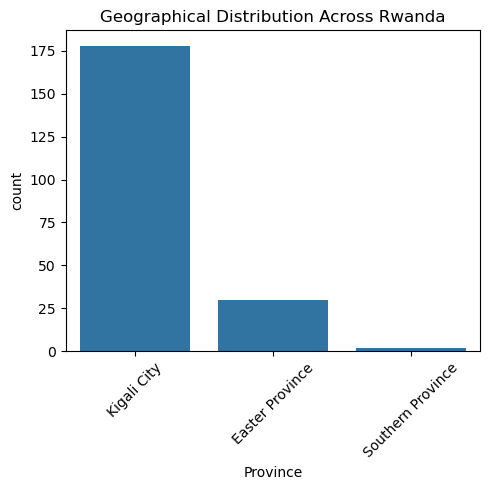

In [124]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Province', order=df['Province'].value_counts().index)
plt.title("Geographical Distribution Across Rwanda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


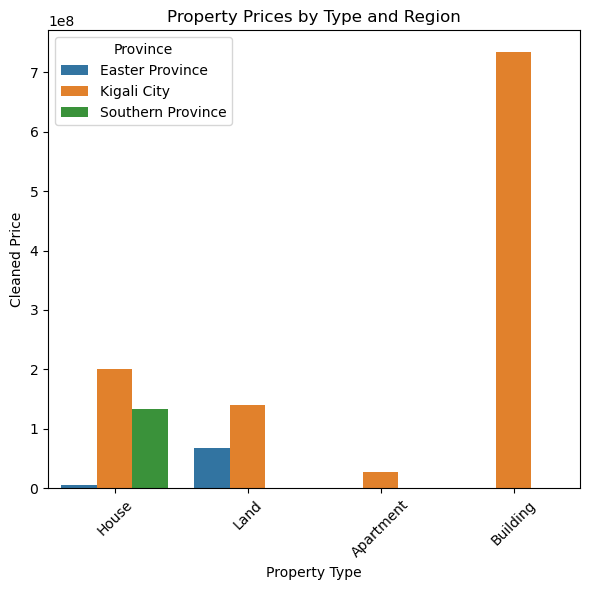

In [126]:
plt.figure(figsize=(6, 6))
sns.barplot(data=Average_by_province_property, x='Property Type', y='Cleaned Price', hue='Province')
plt.title("Property Prices by Type and Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


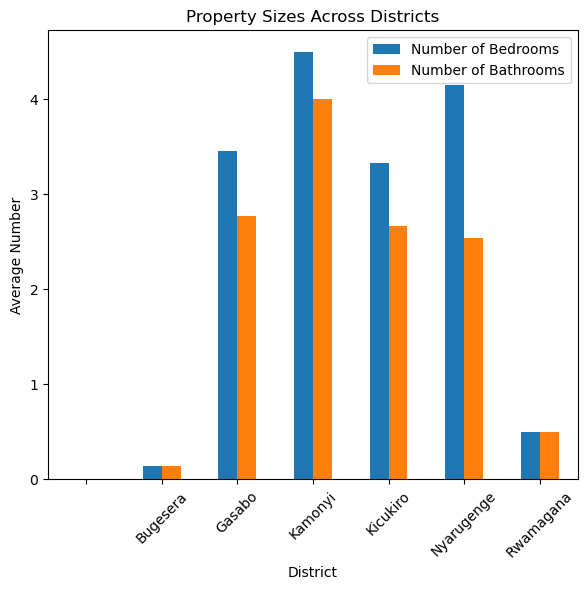

In [128]:
group_bed_bath = df.groupby('District')[['Number of Bedrooms', 'Number of Bathrooms']].mean()
group_bed_bath.plot(kind='bar', figsize=(6, 6))
plt.title("Property Sizes Across Districts")
plt.ylabel("Average Number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


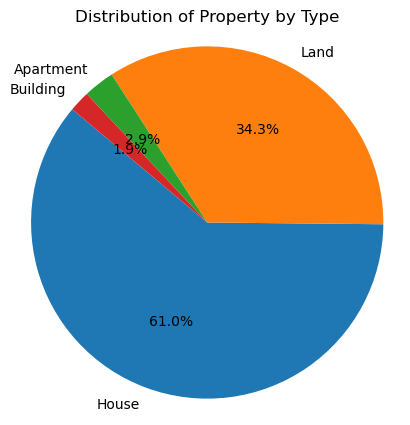

In [72]:
plt.figure(figsize=(5, 5))
plt.pie(count_by_type['Count'], labels=count_by_type['Property Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property by Type')
plt.axis('equal')
plt.show()

In [104]:
# Ensure numeric columns
df['Number of Bedrooms'] = pd.to_numeric(df['Number of Bedrooms'], errors='coerce')
df['Number of Bathrooms'] = pd.to_numeric(df['Number of Bathrooms'], errors='coerce')
df['Cleaned Price'] = pd.to_numeric(df['Cleaned Price'], errors='coerce')

# Group and summarize
summary = df.groupby('Posted By').agg({
    'Property Title': 'count',
    'Number of Bedrooms': 'sum',
    'Number of Bathrooms': 'sum',
    'Cleaned Price': 'sum'
}).reset_index()

# Rename columns
summary.columns = ['Posted By', 'Total Listings', 'Total Bedrooms', 'total Bathrooms', 'Total Price']

# Sort by number of listings
top_posters = summary.sort_values(by='Total Listings', ascending=False).head(10)

print(top_posters)


                Posted By  Total Listings  Total Bedrooms  total Bathrooms  \
20  Sellers Robert Buyers              37              36               25   
3          Derick Karimba              35             142               90   
9     MUHAWENAYO Emmanuel              23             105               91   
0       ADX SOLUTIONS LTD              13              31               28   
13             NKAKA Yves              11              36               31   
21    Success Real Estate              11              44               34   
10          Mugisha Divin              11               8                6   
4         House in Rwanda               9              27               23   
18    Niyonsaba Jean Paul               9              17               12   
17      Niyomwungeri Noel               7              32               27   

     Total Price  
20  6.188524e+09  
3   8.592000e+09  
9   2.788900e+09  
0   2.130110e+09  
13  1.722000e+06  
21  2.200120e+09  
10  1.54

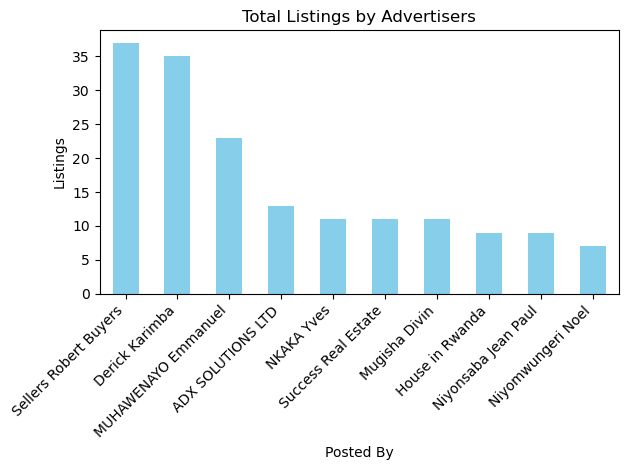

In [106]:
top_posters.plot(kind='bar', x='Posted By', y='Total Listings', color='skyblue', title='Total Listings by Advertisers', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Listings')
plt.tight_layout()
plt.show()

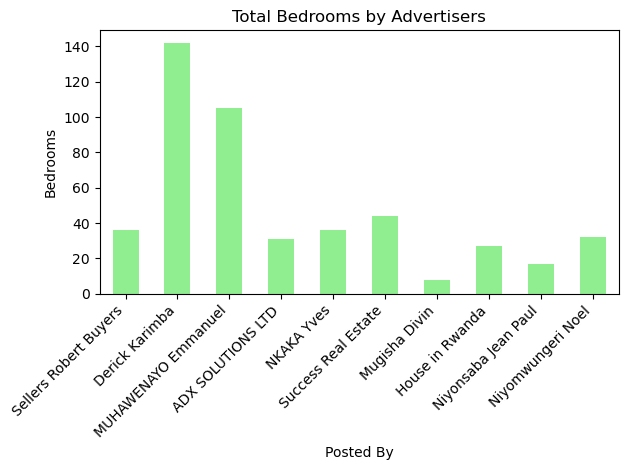

In [108]:
top_posters.plot(kind='bar', x='Posted By', y='Total Bedrooms', color='lightgreen', title='Total Bedrooms by Advertisers', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Bedrooms')
plt.tight_layout()
plt.show()


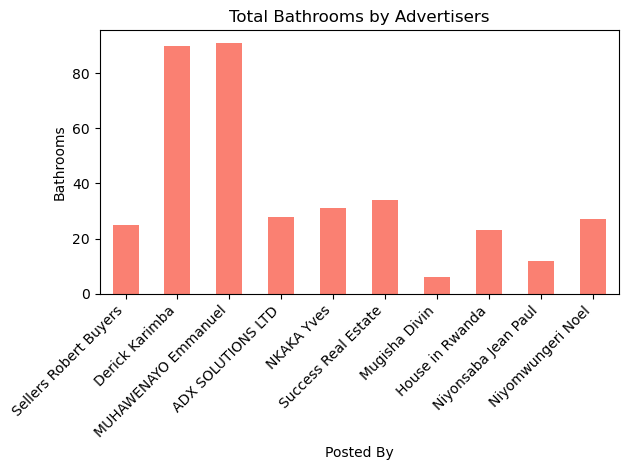

In [112]:
top_posters.plot(kind='bar', x='Posted By', y='total Bathrooms', color='salmon', title='Total Bathrooms by Advertisers', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Bathrooms')
plt.tight_layout()   
plt.show()


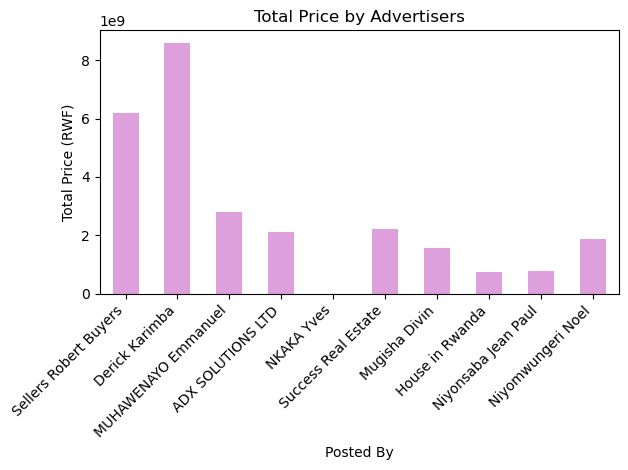

In [114]:
top_posters.plot(kind='bar', x='Posted By', y='Total Price', color='plum', title='Total Price by Advertisers', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Price (RWF)')
plt.tight_layout()
plt.show()
